##ReadMe:
###What's in this notebook?

1. This notebook is simplifying the labels in the following variables for the second logistic regression model:

  * 'race' (5 labels) = 'white_y_n' (2 labels)
  * 'state' (51 labels) = 'party_pref' (2 labels)
  * 'armed' (20 labels) = 'armed_y_n' (2 labels)
  * 'flee' (5 labels) = 'flee_y_n'(2 labels)

2. The labels for each group are simiplied to have binary labels for each variable by grouping appropriately. The new labels become the following.

  * 'white_y_n' --> labels: [white, non_white]
  * 'party_pref' --> labels: [red, blue]
  * 'armed_y_n' --> labels: [yes, no]
  * 'flee_y_n' --> labels: [yes, no]

3. Further data visualizations are made to explore these new variables and how they interact with mental illness found in the dataset. These will printed at the bottome of this notebook

4. A new file will be outputted.

*Note: the labels are first narrowed down to three labels (i.e. yes, no, n/a) and the after the rows of data containing not reported (n/a) data is dropped.*


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#MELISSA'S PATH
path = "/content/drive/MyDrive/DSCI531/project/"


In [ ]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
#Loading clean Dataset ##clean_wapo_data.csv
with open(path + "cleaned_data.csv", encoding="latin1", errors='ignore') as fh:
  clean_wapo_ds = pd.read_csv(fh)

In [ ]:
#Save df as new variable
wapo_ds = clean_wapo_ds
# #View Data
# wapo_ds.head()

In [ ]:
# Drop data Unnamed
wapo_ds.drop(columns=wapo_ds.columns[0], inplace=True)

In [ ]:
wapo_ds.head()

,date,year,month_year,name,age,gender,armed,race,city,state,flee,body_camera,signs_of_mental_illness,police_departments_involved
0,2015-01-02,2015,01-2015,Lewis Lee Lembke,47.0,male,gun,White,Aloha,OR,not,False,False,"Washington County Sheriff's Office, OR"
1,2015-01-02,2015,01-2015,Tim Elliot,53.0,male,gun,Asian,Shelton,WA,not,False,True,"Mason County Sheriff's Office, WA"
2,2015-01-03,2015,01-2015,John Paul Quintero,23.0,male,unarmed,Hispanic,Wichita,KS,not,False,False,"Wichita Police Department, KS"
3,2015-01-04,2015,01-2015,Kenneth Joe Brown,18.0,male,gun,White,Guthrie,OK,not,False,False,"Oklahoma Highway Patrol, OK"
4,2015-01-04,2015,01-2015,Michael Rodriguez,39.0,male,other,Hispanic,Evans,CO,not,False,False,"Evans Police Department, CO"


In [ ]:
print (len(wapo_ds))

7035


In [ ]:
# #Counting NAs, if exist
# n_nans = wapo_ds.isna().sum()
# print ("Detailed NAs per column:\n", n_nans)
# total_count_nans = wapo_ds.isna().sum().sum()
# print ("Total NAs:", total_count_nans)

In [ ]:
# #Data types for each of the dataset column
# print ("The Data types of each column of the dataset are: \n ", wapo_ds.dtypes)

##Creating White vs Non-White Race Feature
####Instead of listing all the races, only looking to simplify the labels by making them binary: either their White or non-White

In [ ]:
## PART 1: GETTING VALUE COUNTS OF RACE VARIABLE
### Getting list of value counts to know dictionary keys for step 2.
###RACE
race_count = wapo_ds['race'].value_counts()
print(race_count)

White              3605
Black              1898
Hispanic           1282
Asian               141
Native American     109
Name: race, dtype: int64


In [ ]:
## PART 2: CREATING RACE DICTIONARY
####A new column white_y_n is going to use this dictionary to create the column
####with keys as races and whether they are White or Not White as the values.

# Keys: white = White, non_white = (Black, Hispanic, Asian, Native American)

race_dict = { 'White' : 'white',
 'Black' : 'non_white',
 'Hispanic' : 'non_white',
 'Asian' : 'non_white',
 'Native American' : 'non_white'}


In [ ]:
## PART 2: CREATING POLITICAL PARTY PREFERENCE COLUMN = party_pref
### 1. Create party_pref column
wapo_ds['white_y_n'] = ''

In [ ]:
## PART 3: FILLING WHITE VS NON_WHITE COLUMN = white_y_n
### 2. Check the race of each data entry against keys of race_dict
### 3. Add value of each key into the white_y_n column

#Loop through the dataset
for i in range(len(wapo_ds['race'])):
    #if the value in the 'race' column exists as a key in the rac_dict dictionary
    if wapo_ds.loc[i, 'race'] in race_dict:
        # if the value of the 'race' column matches, enter the corresponding value from race_dict in 'white_y_n' column
        wapo_ds.loc[i, 'white_y_n'] = race_dict[wapo_ds.loc[i, 'race']]

In [ ]:
## PART 5: MOVE party_pref NEXT TO STATE COLUMN
### 1. Move party_pref column next to state column so that it's easier to read.
wapo_ds = wapo_ds.reindex(columns=['date','year', 'month_year', 'name', 'age', 'gender', 'armed', 'race', 'white_y_n', 'city', 'state','flee', 'body_camera', 'signs_of_mental_illness', 'police_departments_involved'])

In [ ]:
#Getting new value counts
white_y_n_count = wapo_ds['white_y_n'].value_counts()
print(white_y_n_count)
print (len(white_y_n_count))

white        3605
non_white    3430
Name: white_y_n, dtype: int64
2


In [ ]:
wapo_ds.head()

,date,year,month_year,name,age,gender,armed,race,white_y_n,city,state,flee,body_camera,signs_of_mental_illness,police_departments_involved
0,2015-01-02,2015,01-2015,Lewis Lee Lembke,47.0,male,gun,White,white,Aloha,OR,not,False,False,"Washington County Sheriff's Office, OR"
1,2015-01-02,2015,01-2015,Tim Elliot,53.0,male,gun,Asian,non_white,Shelton,WA,not,False,True,"Mason County Sheriff's Office, WA"
2,2015-01-03,2015,01-2015,John Paul Quintero,23.0,male,unarmed,Hispanic,non_white,Wichita,KS,not,False,False,"Wichita Police Department, KS"
3,2015-01-04,2015,01-2015,Kenneth Joe Brown,18.0,male,gun,White,white,Guthrie,OK,not,False,False,"Oklahoma Highway Patrol, OK"
4,2015-01-04,2015,01-2015,Michael Rodriguez,39.0,male,other,Hispanic,non_white,Evans,CO,not,False,False,"Evans Police Department, CO"


##Creating State Political Party Preference Feature
####Instead of listing all the states (+ DC), looking to simplify the labels for state by political preference of each state.

In [ ]:
## PART 1: GETTING VALUE COUNTS OF STATE VARIABLE
### Getting list of value counts to know dictionary keys for step 2.
###STATE
state_count = wapo_ds['state'].value_counts()
print("There are", len(state_count), "states in this dataset")
print(state_count)

There are 51 states in this dataset
CA    940
TX    636
FL    455
AZ    302
GA    268
CO    240
OH    216
NC    213
TN    205
OK    200
MO    184
WA    168
LA    149
IL    147
PA    143
NM    141
IN    140
VA    134
AL    134
NY    129
KY    127
SC    122
NV    118
MI    116
WI    114
OR    111
MD    109
AR     97
MS     92
MN     85
UT     82
NJ     76
KS     75
WV     61
ID     56
MA     48
MT     48
IA     47
AK     47
NE     39
HI     35
ME     32
DC     23
CT     22
WY     20
NH     20
SD     19
ND     18
DE     15
VT     12
RI      5
Name: state, dtype: int64


In [ ]:
## PART 2: CREATING STATE POLITICAL PARTY PREFERENCE DICTIONARY
####A new column party_pref is going to use this dictionary to create the column
####with keys as states and the majority party affiation of each state as the values.
####Using the data from: https://www.pewresearch.org/religion/religious-landscape-study/compare/party-affiliation/by/state/

# Keys: red = republican state, blue = democratic state, split = split down the middle

party_pref_dict = { 'AK' : 'red',
 'AL' : 'red',
 'AR' : 'red',
 'AZ' : 'red',
 'CA' : 'blue',
 'CO' : 'blue',
 'CT' : 'blue',
 'DC' : 'blue',
 'DE' : 'blue',
 'FL' : 'blue', #little sus
 'GA' : 'split',
 'HI' : 'blue',
 'IA' : 'red',
 'ID' : 'red',
 'IL' : 'blue',
 'IN' : 'red',
 'KS' : 'red',
 'KY' : 'red',
 'LA' : 'blue',
 'MA' : 'blue',
 'MD' : 'blue',
 'ME' : 'blue',
 'MI' : 'red',
 'MN' : 'blue',
 'MO' : 'blue',
 'MS' : 'red',
 'MT' : 'red',
 'NC' : 'blue',
 'ND' : 'red',
 'NE' : 'red',
 'NH' : 'blue',
 'NJ' : 'blue',
 'NM' : 'blue',
 'NV' : 'blue',
 'NY' : 'blue',
 'OH' : 'red',
 'OK' : 'red',
 'OR' : 'blue',
 'PA' : 'blue',
 'RI' : 'blue',
 'SC' : 'red',
 'SD' : 'red',
 'TN' : 'red',
 'TX' : 'blue', #also sus
 'UT' : 'red',
 'VA' : 'red',
 'VT' : 'blue',
 'WA' : 'blue',
 'WI' : 'split',
 'WV' : 'red',
 'WY' : 'red',}


In [ ]:
## PART 3: CREATING POLITICAL PARTY PREFERENCE COLUMN = party_pref
### 1. Create party_pref column
wapo_ds['party_pref'] = ''

In [ ]:
# wapo_ds.head()

In [ ]:
## PART 4: FILLING POLITICAL PARTY PREFERENCE COLUMN = party_pref
### 2. Check the state of each data entry against keys of party_pref_dict
### 3. Add value of each key into the party_pref column

# Loop through the dataset
for i in range(len(wapo_ds['state'])):
    # Check if the value in the 'state' column exists as a key in the party_pref_dict dictionary
    if wapo_ds.loc[i, 'state'] in party_pref_dict:
        #  If the value of the 'staet' column matches, enter the corresponding value from the dictionary in 'party_pref' column
        wapo_ds.loc[i, 'party_pref'] = party_pref_dict[wapo_ds.loc[i, 'state']]

In [ ]:
# wapo_ds.head()

In [ ]:
## PART 5: MOVE party_pref NEXT TO STATE COLUMN
### 1. Move party_pref column next to state column so that it's easier to read.
wapo_ds = wapo_ds.reindex(columns=['date','year', 'month_year', 'name', 'age', 'gender', 'armed', 'race', 'white_y_n', 'city', 'state', 'party_pref','flee', 'body_camera', 'signs_of_mental_illness', 'police_departments_involved'])

In [ ]:
party_pref_count = wapo_ds['party_pref'].value_counts()
print(party_pref_count)
print (len(party_pref_count))

blue     4256
red      2397
split     382
Name: party_pref, dtype: int64
3


In [ ]:
wapo_ds.head()

,date,year,month_year,name,age,gender,armed,race,white_y_n,city,state,party_pref,flee,body_camera,signs_of_mental_illness,police_departments_involved
0,2015-01-02,2015,01-2015,Lewis Lee Lembke,47.0,male,gun,White,white,Aloha,OR,blue,not,False,False,"Washington County Sheriff's Office, OR"
1,2015-01-02,2015,01-2015,Tim Elliot,53.0,male,gun,Asian,non_white,Shelton,WA,blue,not,False,True,"Mason County Sheriff's Office, WA"
2,2015-01-03,2015,01-2015,John Paul Quintero,23.0,male,unarmed,Hispanic,non_white,Wichita,KS,red,not,False,False,"Wichita Police Department, KS"
3,2015-01-04,2015,01-2015,Kenneth Joe Brown,18.0,male,gun,White,white,Guthrie,OK,red,not,False,False,"Oklahoma Highway Patrol, OK"
4,2015-01-04,2015,01-2015,Michael Rodriguez,39.0,male,other,Hispanic,non_white,Evans,CO,blue,not,False,False,"Evans Police Department, CO"


## Create Binary "Armed" Feature
####Instead of listing what the victims were armed with if any, looking to simplify the labels for the armed category.

In [ ]:
## PART 1: GETTING VALUE COUNTS OF ARMED VARIABLE
### Getting list of value counts to know dictionary keys for step 2.
###ARMWS
armed_count = wapo_ds['armed'].value_counts()
print(armed_count)
print (len(armed_count))

gun                          4049
knife                        1195
unarmed                       453
replica                       253
vehicle                       243
undetermined                  215
not_reported                  199
blunt_object                  174
unknown                        96
other                          74
gun,vehicle                    31
gun,knife                      29
vehicle,gun                    11
other,gun                       3
blunt_object,blunt_object       2
knife,blunt_object              2
blunt_object,knife              2
knife,vehicle                   2
replica,vehicle                 1
vehicle,knife,other             1
Name: armed, dtype: int64
20


In [ ]:
## PART 2: CREATING ARMED DICTIONARY
####A new column armed_y_n is going to use this dictionary to create the column
####with keys as armed method, if any, and either yes, no, or n/a as the values.

# Keys:
# undetermined, not_reported, = n/a, unknown = no, everything else = yes

armed_dict = { 'gun' : 'yes',
 'knife' : 'yes',
 'unarmed' : 'no',
 'replica' : 'yes',
 'vehicle' : 'yes',
 'undetermined' : 'unknown',
 'not_reported' : 'unknown',
 'blunt_object' : 'yes',
 'unknown' : 'unknown',
 'other' : 'yes',
 'gun,vehicle' : 'yes',
 'gun,knife' : 'yes',
 'vehicle,gun' : 'yes',
 'other,gun' : 'yes',
 'blunt_object,blunt_object' : 'yes',
 'knife,blunt_object' : 'yes',
 'blunt_object,knife' : 'yes',
 'knife,vehicle' : 'yes',
 'replica,vehicle' : 'yes',
 'vehicle,knife,other' : 'yes'}


In [ ]:
## PART 3: CREATING NEW ARMED YES / NO COLUMN = armed_y_n
### 1. Create armed_y_n column - add an empty column

wapo_ds['armed_y_n'] = ''

In [ ]:
## PART 4: FILL NEW ARMED YES / NO COLUMN = armed_y_n
### 2. Check the 'armed' feature of each data entry against keys of armed_dict
### 3. Add value of each key into the armed_y_n column

# Loop through the dataset
for i in range(len(wapo_ds['armed'])):
    # Check if the value in the 'armed' column exists as a key in the armed_dictionary dictionary
    if wapo_ds.loc[i, 'armed'] in armed_dict:
        #  If the value of the 'armed' column matches, enter the corresponding value from the dictionary in 'armed_y_n' column
        wapo_ds.loc[i, 'armed_y_n'] = armed_dict[wapo_ds.loc[i, 'armed']]
        #wapo_ds['armed_y_n'] = armed_dict[i]



In [ ]:
# wapo_ds.head()

In [ ]:
#Checking value counts of new armed_y_n column
new_armed_count = wapo_ds['armed_y_n'].value_counts()
print(new_armed_count)
print (len(new_armed_count))

yes        6072
unknown     510
no          453
Name: armed_y_n, dtype: int64
3


In [ ]:
## PART 5: MOVE armed_y_n NEXT TO ARMED COLUMN
### 1. Move armed_y_n column next to armed column so that it's easier to read.
wapo_ds = wapo_ds.reindex(columns=['date','year', 'month_year', 'name', 'age', 'gender', 'armed', 'armed_y_n', 'race', 'white_y_n', 'city', 'state', 'party_pref', 'flee', 'body_camera', 'signs_of_mental_illness', 'police_departments_involved'])


In [ ]:
wapo_ds.head()
#print(len(wapo_ds))

,date,year,month_year,name,age,gender,armed,armed_y_n,race,white_y_n,city,state,party_pref,flee,body_camera,signs_of_mental_illness,police_departments_involved
0,2015-01-02,2015,01-2015,Lewis Lee Lembke,47.0,male,gun,yes,White,white,Aloha,OR,blue,not,False,False,"Washington County Sheriff's Office, OR"
1,2015-01-02,2015,01-2015,Tim Elliot,53.0,male,gun,yes,Asian,non_white,Shelton,WA,blue,not,False,True,"Mason County Sheriff's Office, WA"
2,2015-01-03,2015,01-2015,John Paul Quintero,23.0,male,unarmed,no,Hispanic,non_white,Wichita,KS,red,not,False,False,"Wichita Police Department, KS"
3,2015-01-04,2015,01-2015,Kenneth Joe Brown,18.0,male,gun,yes,White,white,Guthrie,OK,red,not,False,False,"Oklahoma Highway Patrol, OK"
4,2015-01-04,2015,01-2015,Michael Rodriguez,39.0,male,other,yes,Hispanic,non_white,Evans,CO,blue,not,False,False,"Evans Police Department, CO"


## Create Binary "Flee" Feature
####Instead of listing how the victims fled, if any, looking to simplify the labels for the flee category.

In [ ]:
## PART 1: GETTING VALUE COUNTS OF FLEE VARIABLE
### Getting list of value counts to know dictionary keys for step 2.
###FLEE
flee_count = wapo_ds['flee'].value_counts()
print(flee_count)
print (len(flee_count))

not             3959
car             1135
foot             930
not_reported     742
other            269
Name: flee, dtype: int64
5


In [ ]:
## PART 2: CREATING FLEE DICTIONARY
####A new column flee_y_n is going to use this dictionary to create the column
####with keys as flee method and either yes, no, n/a as the values.

# Keys:
# undetermined, not_reported, = n/a, not = no, (car, food, other) = yes

flee_dict = { 'not' : 'no',
 'car' : 'yes',
 'foot' : 'yes',
 'not_reported' : 'unknown',
 'other' : 'yes'}

In [ ]:
## PART 3: CREATING FLEE YES / NO COLUMN = flee_y_n
### 1. Create flee_y_n column - add an empty column

wapo_ds['flee_y_n'] = ''

In [ ]:
## PART 4: FILL NEW FLEE YES / NO COLUMN = flee_y_n
### 2. Check the 'flee' feature of each data entry against keys of flee_dict
### 3. Add value of each key into the flee_y_n column

# Loop through the dataset
for i in range(len(wapo_ds['flee'])):
    # Check if the value in the 'flee' column exists as a key in the flee_dict dictionary
    if wapo_ds.loc[i, 'flee'] in flee_dict:
        #  If the value of the 'flee' column matches, enter the corresponding value from the dictionary in 'flee_y_n' column
        wapo_ds.loc[i, 'flee_y_n'] = flee_dict[wapo_ds.loc[i, 'flee']]


In [ ]:
## PART 5: MOVE flee_y_n NEXT TO flee COLUMN
### 1. Move flee_y_n column next to flee column so that it's easier to read.
wapo_ds = wapo_ds.reindex(columns=['date','year', 'month_year', 'name', 'age', 'gender', 'armed', 'armed_y_n', 'race', 'white_y_n', 'city', 'state', 'party_pref', 'flee', 'flee_y_n', 'body_camera', 'signs_of_mental_illness', 'police_departments_involved'])


In [ ]:
new_flee_count = wapo_ds['flee_y_n'].value_counts()
print(new_flee_count)
print (len(new_flee_count))
#print (type(new_flee_count))

no         3959
yes        2334
unknown     742
Name: flee_y_n, dtype: int64
3


In [ ]:
wapo_ds.head()

,date,year,month_year,name,age,gender,armed,armed_y_n,race,white_y_n,city,state,party_pref,flee,flee_y_n,body_camera,signs_of_mental_illness,police_departments_involved
0,2015-01-02,2015,01-2015,Lewis Lee Lembke,47.0,male,gun,yes,White,white,Aloha,OR,blue,not,no,False,False,"Washington County Sheriff's Office, OR"
1,2015-01-02,2015,01-2015,Tim Elliot,53.0,male,gun,yes,Asian,non_white,Shelton,WA,blue,not,no,False,True,"Mason County Sheriff's Office, WA"
2,2015-01-03,2015,01-2015,John Paul Quintero,23.0,male,unarmed,no,Hispanic,non_white,Wichita,KS,red,not,no,False,False,"Wichita Police Department, KS"
3,2015-01-04,2015,01-2015,Kenneth Joe Brown,18.0,male,gun,yes,White,white,Guthrie,OK,red,not,no,False,False,"Oklahoma Highway Patrol, OK"
4,2015-01-04,2015,01-2015,Michael Rodriguez,39.0,male,other,yes,Hispanic,non_white,Evans,CO,blue,not,no,False,False,"Evans Police Department, CO"


###Dropping data with n/a labels from the variables created (flee_y_n, armed_y_n, party_pref) in order to make them binary features.

In [ ]:
##Checking NAs
#Counting NAs, if exist
n_nans = wapo_ds.isna().sum()
print ("Detailed NAs per column:\n", n_nans)
total_count_nans = wapo_ds.isna().sum().sum()
print ("Total NAs:", total_count_nans)

Detailed NAs per column:
 date                           0
year                           0
month_year                     0
name                           0
age                            0
gender                         0
armed                          0
armed_y_n                      0
race                           0
white_y_n                      0
city                           0
state                          0
party_pref                     0
flee                           0
flee_y_n                       0
body_camera                    0
signs_of_mental_illness        0
police_departments_involved    0
dtype: int64
Total NAs: 0


In [ ]:
#Deciding to only drop the party pref values

# #Dropping data with n/a value for flee_y_n
# wapo_ds.drop(wapo_ds[wapo_ds['flee_y_n'] == 'n/a'].index, inplace = True)
# #Dropping data with n/a value for armed_y_n
# wapo_ds.drop(wapo_ds[wapo_ds['armed_y_n'] == 'n/a'].index, inplace = True)


#Dropping data with n/a value for party_pref #Focusing on this one for now.
wapo_ds.drop(wapo_ds[wapo_ds['party_pref'] == 'split'].index, inplace = True)

In [ ]:
#Checking party_pref account
party_pref_count = wapo_ds['party_pref'].value_counts()
print(party_pref_count)
print (len(party_pref_count))

blue    4256
red     2397
Name: party_pref, dtype: int64
2


In [ ]:
print(len(wapo_ds))

6653


###Further Exploratory Analysis

Looking at the data and seeing how these new binary values interact with mental illnes.

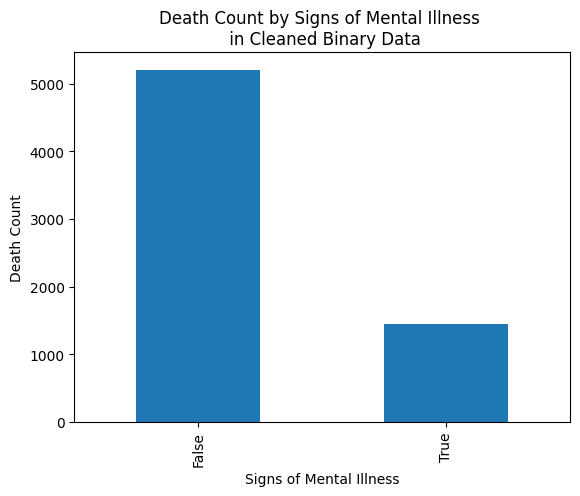

In [ ]:
###Bar chart of distribution of party preference

#using value counts to plot count of column
wapo_ds['signs_of_mental_illness'].value_counts().plot(kind='bar')

plt.xlabel('Signs of Mental Illness')
plt.ylabel('Death Count')
plt.title('Death Count by Signs of Mental Illness \n in Cleaned Binary Data')

# Show the plot
plt.show()

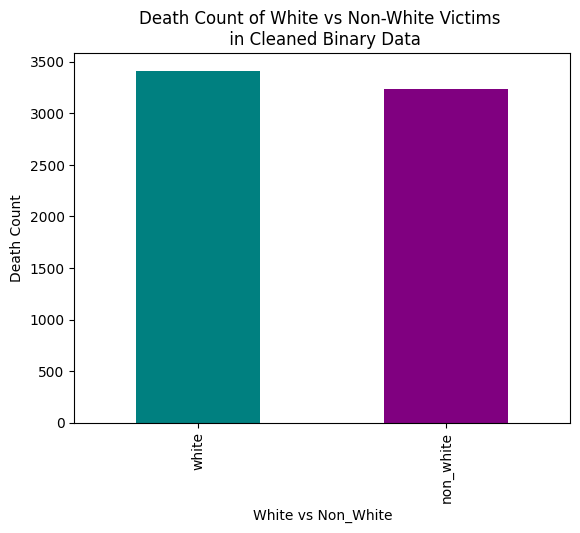

In [ ]:
###Bar chart of distribution of party preference

#using value counts to plot count of column
wapo_ds['white_y_n'].value_counts().plot(kind='bar', color=['teal', 'purple'])

plt.xlabel('White vs Non_White')
plt.ylabel('Death Count')
plt.title('Death Count of White vs Non-White Victims \n in Cleaned Binary Data')
# Show the plot
plt.show()

In [ ]:
###Getting image of mental illness x political party
#Getting count of how many deaths were MI (mental illness) related per political party
mi_signs_w_nw = wapo_ds.groupby(['signs_of_mental_illness', 'white_y_n']).size()

#Movie the boolean count values of MI for each year into a df
mi_per_wnw_count = mi_signs_w_nw .reset_index(drop=False)

#renaming columns of df
mi_df = mi_per_wnw_count.rename(columns={0: "count"})

In [ ]:
print(mi_df)

   signs_of_mental_illness  white_y_n  count
0                    False  non_white   2722
1                    False      white   2480
2                     True  non_white    516
3                     True      white    935


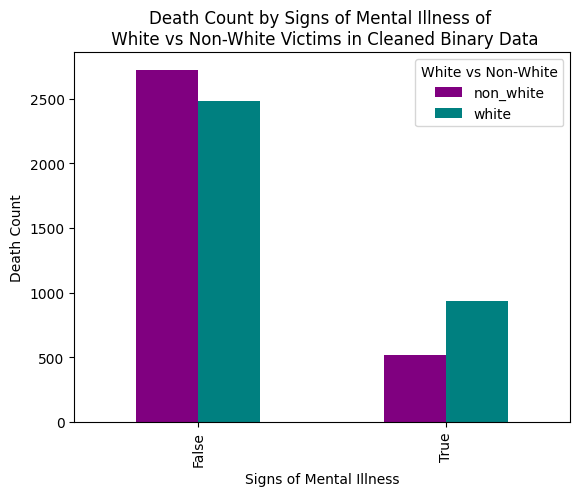

In [ ]:
#Creating df out of the values related to signs_of_mental_illness and white_y_n that I want to plot
df = pd.DataFrame({
    'signs_of_mental_illness': [False, False, True, True],
    'white_y_n': ['non_white', 'white', 'non_white', 'white'],
    'count': [2722, 2480, 516, 935]})

#Pivot the data + create a new dataframe with the counts of each combination of signs_of_mental_illness and white_y_n
pivot_df = df.pivot(index='signs_of_mental_illness', columns='white_y_n', values='count')

#plotting double bar chart
pivot_df.plot(kind='bar', stacked=False, color=['purple', 'teal'])

plt.xlabel('Signs of Mental Illness')
plt.ylabel('Death Count')
plt.title('Death Count by Signs of Mental Illness of \n White vs Non-White Victims in Cleaned Binary Data')
plt.legend(title='White vs Non-White', loc='best')

plt.show()

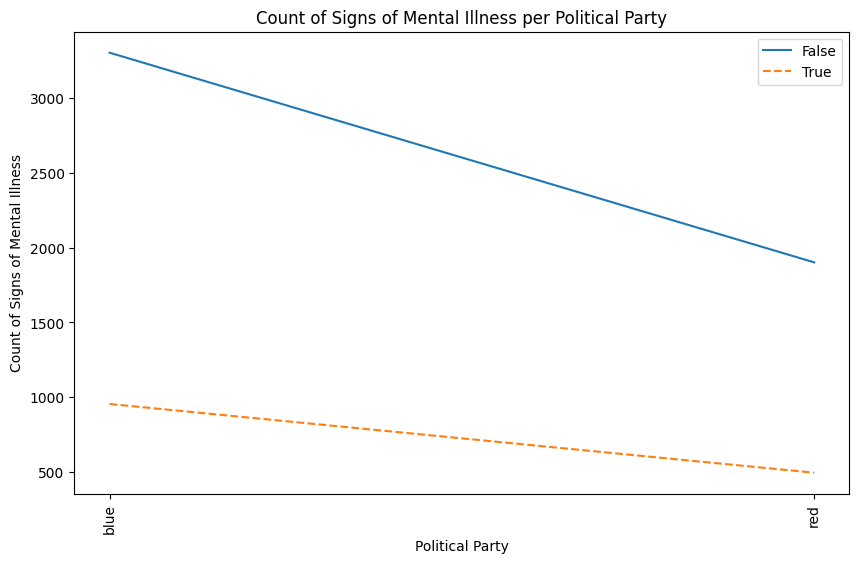

In [ ]:
###Getting image of mental illness x political party
#Getting count of how many deaths were MI (mental illness) related per political party
mi_signs_per_party = wapo_ds.groupby(['signs_of_mental_illness', 'party_pref']).size()

#Movie the boolean count values of MI for each year into a df
mi_per_party_count = mi_signs_per_party.reset_index(drop=False)

#renaming columns of df
mi_df = mi_per_party_count.rename(columns={0: "count"})

#Plotting double line graph
# pivot the dataframe to get the two columns for each sign of mental illness
mi_double_plot = mi_df.pivot(index='party_pref', columns='signs_of_mental_illness', values='count')

#plot the double line graph
ax = mi_double_plot.plot(kind='line', style=['-', '--'], figsize=(10, 6))

# set the x-tick labels
# #x = ['AK', 'AL', 'AR','CA','CO','CT','DE','DC','FL','GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY','LA', 'ME', 'MD', 'MA','MI', 'MN', 'MS', 'MO', 'MT','NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND','OH','OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN','TX', 'UT','VT', 'VA', 'WA', 'WV', 'WI', 'WY']
# ax.set_xticks(range(len(mi_df['state'])))
# ax.set_xticklabels(mi_df['state'], rotation=90)
#ax.set_xticklabels(x)
ax.set_xticks(range(len(mi_df['party_pref'])//2))
ax.set_xticklabels(mi_df['party_pref'][:len(mi_df['party_pref'])//2], rotation=90)

plt.xlabel('Political Party')
plt.ylabel('Count of Signs of Mental Illness')
plt.title('Count of Signs of Mental Illness per Political Party')
plt.legend(['False', 'True'])

#Save plot
plt.savefig('Total Signs of Mental Illness per Political Party 2015-2022.png')

plt.show()

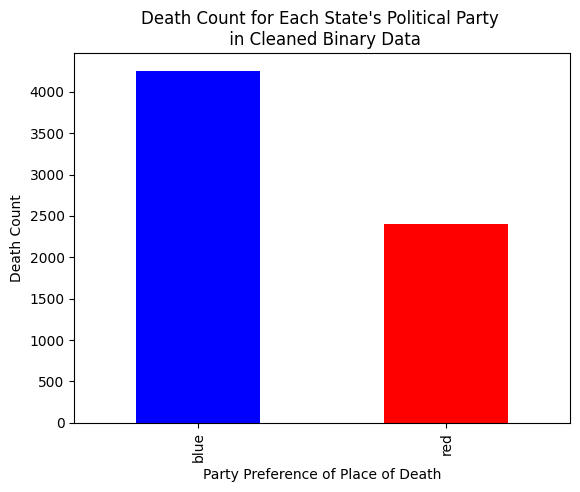

In [ ]:
###Bar chart of distribution of party preference

#using value counts to plot count of column
wapo_ds['party_pref'].value_counts().plot(kind='bar', color=['blue', 'red'])

plt.xlabel('Party Preference of Place of Death')
plt.ylabel('Death Count')
plt.title("Death Count for Each State's Political Party \n in Cleaned Binary Data")
#plt.legend(title='party_pref', loc='best')

plt.show()
# Show the plot
plt.show()

In [ ]:
print (mi_df)

   signs_of_mental_illness party_pref  count
0                    False       blue   3301
1                    False        red   1901
2                     True       blue    955
3                     True        red    496


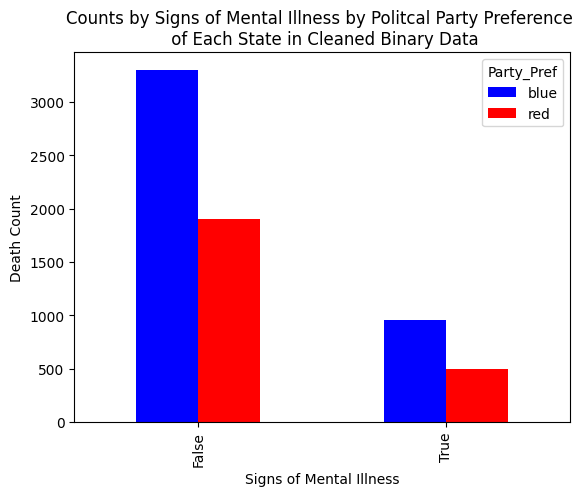

In [ ]:
####NOTE: THIS CELL ONLY WORKS AFTER DROPPING SPLIT FROM PARTY_PREF???
#Creating df out of the values related to signs_of_mental_illness and party_pref that I want to plot
#datai
df = pd.DataFrame({
    'signs_of_mental_illness': [False, False, True, True],
    'party_pref': ['blue', 'red', 'blue', 'red'],
    'count': [3301, 1901, 955, 496]})

#Pivot the data + create a new dataframe with the counts of each combination of signs_of_mental_illness and flee_y_n
pivot_df = df.pivot(index='signs_of_mental_illness', columns='party_pref', values='count')

#plotting double bar chart
pivot_df.plot(kind='bar', stacked=False, color=['blue', 'red'])

plt.xlabel('Signs of Mental Illness')
plt.ylabel('Death Count')
plt.title('Counts by Signs of Mental Illness by Politcal Party Preference \n of Each State in Cleaned Binary Data')
plt.legend(title='Party_Pref', loc='best')

plt.show()

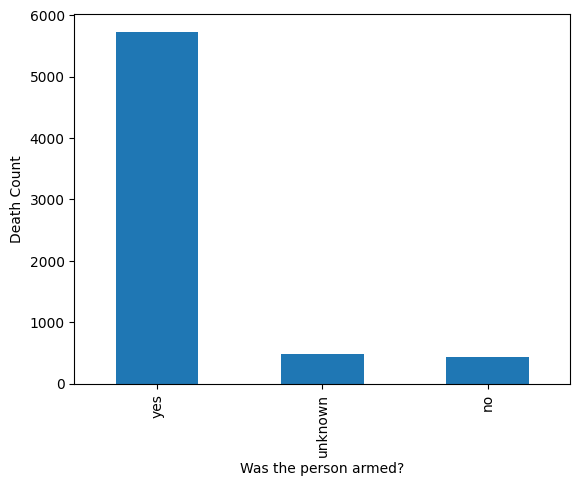

In [ ]:
###Bar chart of distribution of armed_y_n

#using value counts to plot count of column
wapo_ds['armed_y_n'].value_counts().plot(kind='bar')

plt.xlabel('Was the person armed?')
plt.ylabel('Death Count')

# Show the plot
plt.show()

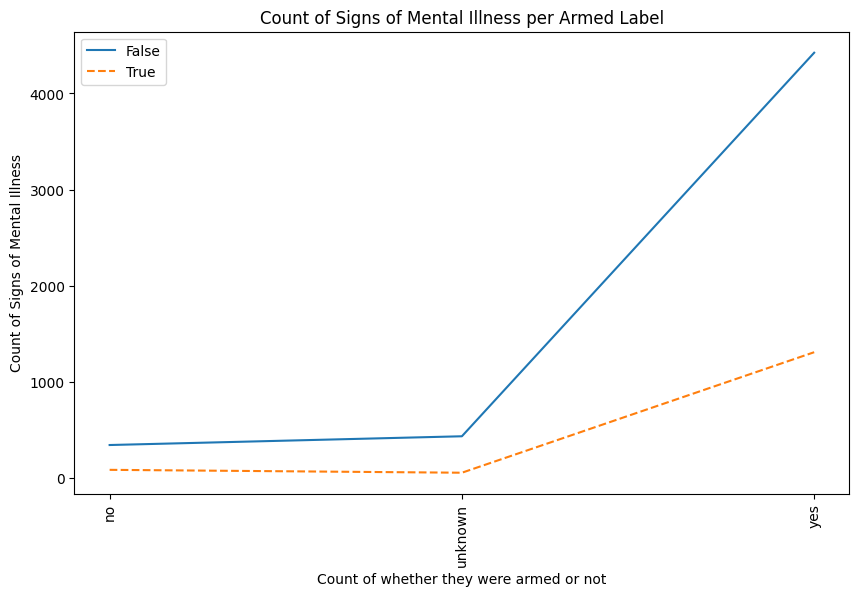

In [ ]:
###Getting image of mental illness x whether they were armed or not
#Getting count of how many deaths were MI (mental illness) related per political party
mi_signs_per_armed = wapo_ds.groupby(['signs_of_mental_illness', 'armed_y_n']).size()

#Movie the boolean count values of MI for each year into a df
mi_per_armed_count = mi_signs_per_armed.reset_index(drop=False)

#renaming columns of df
mi_df = mi_per_armed_count.rename(columns={0: "count"})

#Plotting double line graph
# pivot the dataframe to get the two columns for each sign of mental illness
mi_double_plot = mi_df.pivot(index='armed_y_n', columns='signs_of_mental_illness', values='count')

#plot the double line graph
ax = mi_double_plot.plot(kind='line', style=['-', '--'], figsize=(10, 6))

# set the x-tick labels
# #x = ['AK', 'AL', 'AR','CA','CO','CT','DE','DC','FL','GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY','LA', 'ME', 'MD', 'MA','MI', 'MN', 'MS', 'MO', 'MT','NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND','OH','OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN','TX', 'UT','VT', 'VA', 'WA', 'WV', 'WI', 'WY']
# ax.set_xticks(range(len(mi_df['state'])))
# ax.set_xticklabels(mi_df['state'], rotation=90)
#ax.set_xticklabels(x)
ax.set_xticks(range(len(mi_df['armed_y_n'])//2))
ax.set_xticklabels(mi_df['armed_y_n'][:len(mi_df['armed_y_n'])//2], rotation=90)

plt.xlabel('Count of whether they were armed or not')
plt.ylabel('Count of Signs of Mental Illness')
plt.title('Count of Signs of Mental Illness per Armed Label')
plt.legend(['False', 'True'])

#Save plot
plt.savefig('Total Count of Mentally Ill People Armed vs Not Mentally Ill 2015-2022.png')

plt.show()

In [ ]:
print (mi_df)

   signs_of_mental_illness armed_y_n  count
0                    False        no    344
1                    False   unknown    435
2                    False       yes   4423
3                     True        no     86
4                     True   unknown     56
5                     True       yes   1309


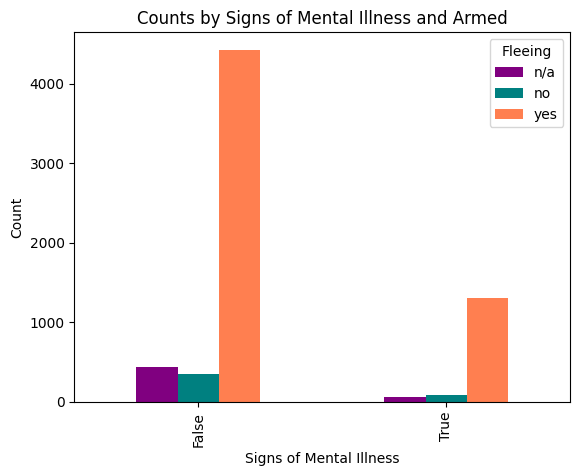

In [ ]:
#Creating df out of the values related to signs_of_mental_illness and armed_y_n that I want to plot
#datai
df = pd.DataFrame({
    'signs_of_mental_illness': [False, False, False, True, True, True],
    'armed_y_n': ['n/a', 'no', 'yes', 'n/a', 'no', 'yes'],
    'count': [435, 344, 4423, 56, 86, 1309]
})

#Pivot the data + create a new dataframe with the counts of each combination of signs_of_mental_illness and flee_y_n
pivot_df = df.pivot(index='signs_of_mental_illness', columns='armed_y_n', values='count')

#plotting double bar chart
pivot_df.plot(kind='bar', stacked=False, color=['purple', 'teal', 'coral'])

plt.xlabel('Signs of Mental Illness')
plt.ylabel('Count')
plt.title('Counts by Signs of Mental Illness and Armed')
plt.legend(title='Fleeing', loc='best')

plt.show()

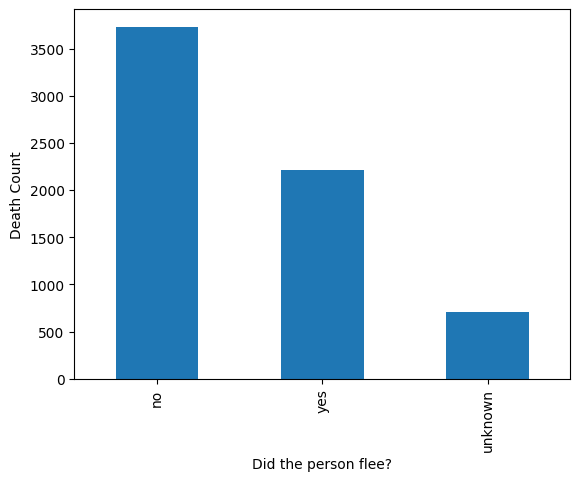

In [ ]:
###Bar chart of distribution of flee_y_n

#using value counts to plot count of column
wapo_ds['flee_y_n'].value_counts().plot(kind='bar')

plt.xlabel('Did the person flee?')
plt.ylabel('Death Count')

#Show the plot
plt.show()

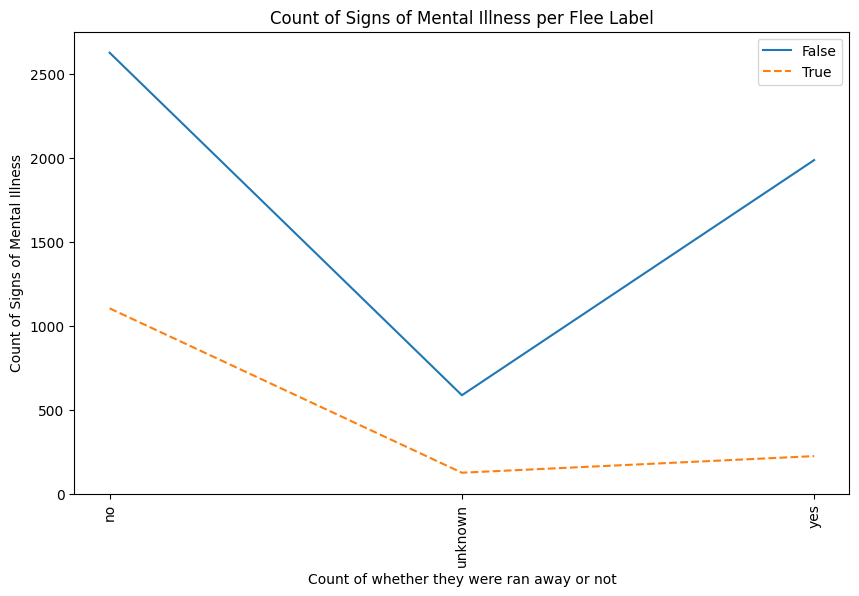

In [ ]:
###Getting image of mental illness x whether they were armed or not
#Getting count of how many deaths were MI (mental illness) related per political party
mi_signs_per_flee = wapo_ds.groupby(['signs_of_mental_illness', 'flee_y_n']).size()

#Movie the boolean count values of MI for each year into a df
mi_per_flee_count = mi_signs_per_flee.reset_index(drop=False)

#renaming columns of df
mi_df = mi_per_flee_count.rename(columns={0: "count"})

#Plotting double line graph
#pivot the dataframe to get the two columns for each sign of mental illness
mi_double_plot = mi_df.pivot(index='flee_y_n', columns='signs_of_mental_illness', values='count')

#plot the double line graph
ax = mi_double_plot.plot(kind='line', style=['-', '--'], figsize=(10, 6))

ax.set_xticks(range(len(mi_df['flee_y_n'])//2))
ax.set_xticklabels(mi_df['flee_y_n'][:len(mi_df['flee_y_n'])//2], rotation=90)

plt.xlabel('Count of whether they were ran away or not')
plt.ylabel('Count of Signs of Mental Illness')
plt.title('Count of Signs of Mental Illness per Flee Label')
plt.legend(['False', 'True'])

#Save plot
plt.savefig('Total Count of Mentally Ill People that Ran Away vs Not Mentally Ill 2015-2022.png')

plt.show()

In [ ]:
print(mi_df)

   signs_of_mental_illness flee_y_n  count
0                    False       no   2628
1                    False  unknown    586
2                    False      yes   1988
3                     True       no   1104
4                     True  unknown    124
5                     True      yes    223


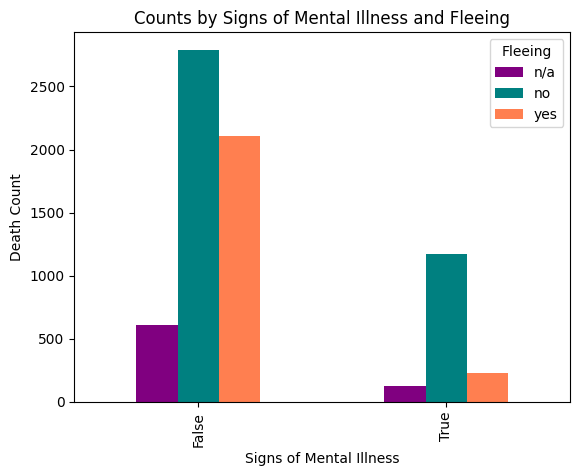

In [ ]:
#Create df out of the values related to signs_of_mental_illness and flee_y_n that I want to plot
df = pd.DataFrame({
    'signs_of_mental_illness': [False, False, False, True, True, True],
    'flee_y_n': ['n/a', 'no', 'yes', 'n/a', 'no', 'yes'],
    'count': [613, 2790, 2105, 129, 1169, 229]
})

#Pivot the data + create a new dataframe with the counts of each combination of signs_of_mental_illness and flee_y_n
pivot_df = df.pivot(index='signs_of_mental_illness', columns='flee_y_n', values='count')

#plotting double bar chart
pivot_df.plot(kind='bar', stacked=False, color=['purple', 'teal', 'coral'])

plt.xlabel('Signs of Mental Illness')
plt.ylabel('Death Count')
plt.title('Counts by Signs of Mental Illness and Fleeing')
plt.legend(title='Fleeing', loc='best')

plt.show()

In [ ]:
###exploring what race and party_pref looks like

mi_signs_per_rp = wapo_ds.groupby(['white_y_n', 'party_pref']).size()

#Movie the boolean count values of MI for each year into a df
mi_per_rp_count = mi_signs_per_rp.reset_index(drop=False)

#renaming columns of df
mi_df = mi_per_rp_count.rename(columns={0: "count"})

print(mi_df)

   white_y_n party_pref  count
0  non_white       blue   2373
1  non_white        red    865
2      white       blue   1883
3      white        red   1532


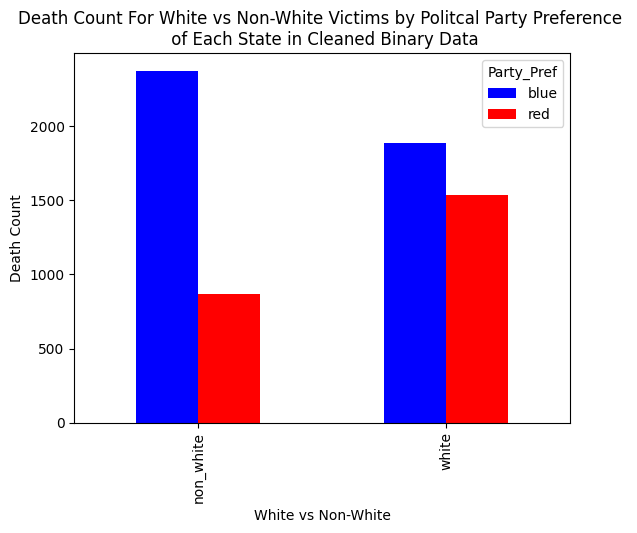

In [ ]:
df = pd.DataFrame({
    'white_y_n': ['non_white', 'non_white', 'white', 'white'],
    'party_pref': ['blue', 'red', 'blue', 'red'],
    'count': [2373, 865, 1883, 1532]})

#Pivot the data + create a new dataframe with the counts of each combination of signs_of_mental_illness and flee_y_n
pivot_df = df.pivot(index='white_y_n', columns='party_pref', values='count')

#plotting double bar chart
pivot_df.plot(kind='bar', stacked=False, color=['blue', 'red'])

plt.xlabel('White vs Non-White')
plt.ylabel('Death Count')
plt.title('Death Count For White vs Non-White Victims by Politcal Party Preference \n of Each State in Cleaned Binary Data')
plt.legend(title='Party_Pref', loc='best')

plt.show()

In [ ]:
###exploring what race and party_pref looks like

mi_signs_per_rp = wapo_ds.groupby(['race', 'party_pref']).size()

#Movie the boolean count values of MI for each year into a df
mi_per_rp_count = mi_signs_per_rp.reset_index(drop=False)

#renaming columns of df
mi_df = mi_per_rp_count.rename(columns={0: "count"})

print(mi_df)

              race party_pref  count
0            Asian       blue    115
1            Asian        red     20
2            Black       blue   1170
3            Black        red    573
4         Hispanic       blue   1056
5         Hispanic        red    199
6  Native American       blue     32
7  Native American        red     73
8            White       blue   1883
9            White        red   1532


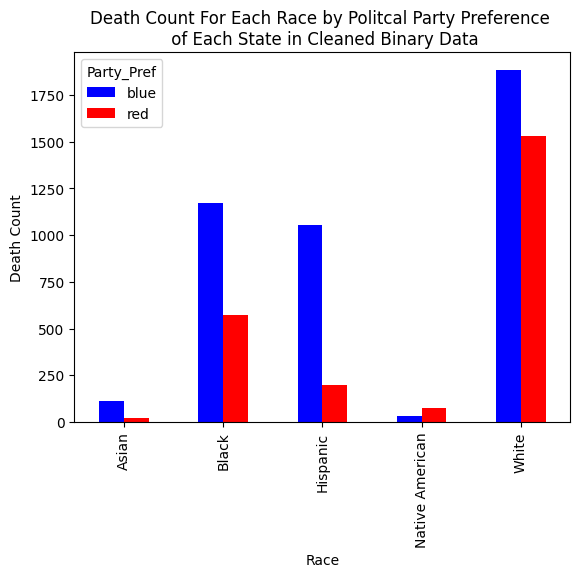

In [ ]:
df = pd.DataFrame({
    'race': ['Asian', 'Asian', 'Black', 'Black', 'Hispanic', 'Hispanic', 'Native American','Native American','White', 'White'],
    'party_pref': ['blue', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'red'],
    'count': [115, 20, 1170, 573, 1056, 199, 32, 73, 1883, 1532]})

#Pivot the data + create a new dataframe with the counts of each combination of signs_of_mental_illness and flee_y_n
pivot_df = df.pivot(index='race', columns='party_pref', values='count')

#plotting double bar chart
pivot_df.plot(kind='bar', stacked=False, color=['blue', 'red'])

plt.xlabel('Race')
plt.ylabel('Death Count')
plt.title('Death Count For Each Race by Politcal Party Preference \n of Each State in Cleaned Binary Data')
plt.legend(title='Party_Pref', loc='best')

plt.show()

##Save New CSV


In [ ]:
##UNCOMMENT TO SAVE CLEAN DATASET
# creating a pandas dataframe with the cleaned data
second_analysis_data_512023 = pd.DataFrame(wapo_ds)

# writing the dataframe to a csv file
second_analysis_data_512023.to_csv("/content/drive/MyDrive/DSCI531/project/second_analysis_data_512023.csv", index = False)